### importing libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 

%matplotlib inline
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

### loading dataset

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv ")
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:

df_copy = df.copy()
df_copy.TotalCharges = None
df_copy.TotalCharges=df_copy.TotalCharges.astype(float)
df_copy.TotalCharges.dtype

dtype('float64')

In [9]:
df_copy.TotalCharges = df_copy.tenure * df_copy.MonthlyCharges

In [10]:
df_copy[df_copy.tenure * df_copy.MonthlyCharges != df_copy.TotalCharges].shape

(0, 21)

In [12]:
# store the clean data
df_copy.reset_index(drop=True)
df_copy.to_csv('Telco-Customer-Churn_clean.csv')

In [6]:
clean_df = pd.read_csv('Telco-Customer-Churn_clean.csv')

In [8]:
clean_df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
clean_df.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.162147,32.371149,64.761692,2279.581350
std,2033.283305,0.368612,24.559481,30.090047,2264.729447
min,0.000000,0.000000,0.000000,18.250000,0.000000
25%,1760.500000,0.000000,9.000000,35.500000,394.000000
50%,3521.000000,0.000000,29.000000,70.350000,1393.600000
75%,5281.500000,0.000000,55.000000,89.850000,3786.100000
max,7042.000000,1.000000,72.000000,118.750000,8550.000000


In [20]:
new_df = clean_df.groupby([ 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies'])['MonthlyCharges'].sum().reset_index()
new_df

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges
0,No,No phone service,DSL,No,No,No,No,No,No,1992.30
1,No,No phone service,DSL,No,No,No,No,No,Yes,631.25
2,No,No phone service,DSL,No,No,No,No,Yes,No,423.30
3,No,No phone service,DSL,No,No,No,No,Yes,Yes,946.60
4,No,No phone service,DSL,No,No,No,Yes,No,No,628.75
...,...,...,...,...,...,...,...,...,...,...
317,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,1520.20
318,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,1476.65
319,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,No,1158.95
320,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,13924.45


In [19]:
clean_df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [20]:
clean_df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

## 1. Demographic:

### 1.a  Which 2 demographics have proven to be the most popular with the telco brand? 

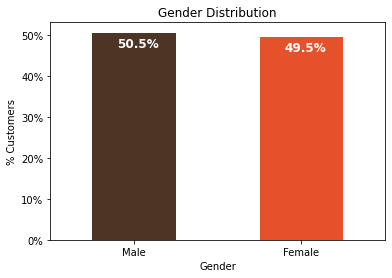

In [14]:
# Gender Distribution


colors = ['#4D3425','#E4512B']
ax = (clean_df['gender'].value_counts()*100.0 /len(clean_df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

 About half of the customers in our data set are male while the other half are female

Text(0.5, 1.0, '% of Senior Citizens')

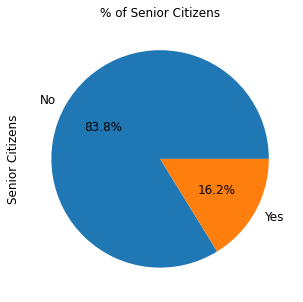

In [25]:
### Age Range

ax = (clean_df['SeniorCitizen'].value_counts()*100.0 /len(clean_df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

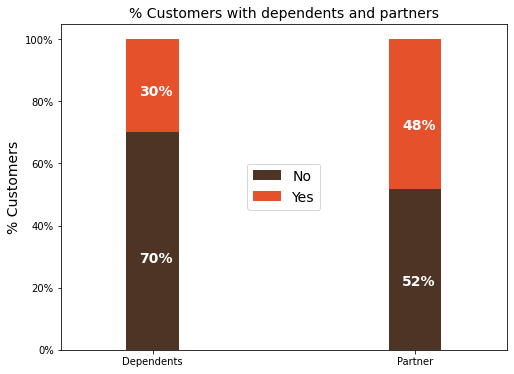

In [15]:
### Partner and dependent status

df2 = pd.melt(clean_df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(clean_df)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)


About 50% of the customers have a partner, while only 30% of the total customers have dependents.

 The top 2 demographics hat have proven to be the most popular with the telco brand are the young people , and those those without dependants

### b.  If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?

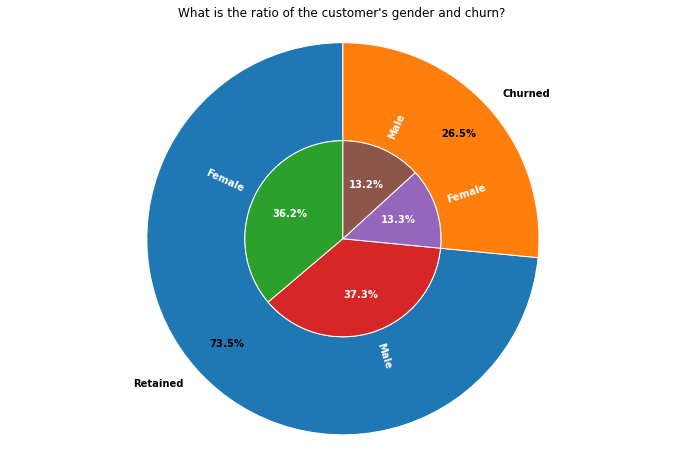

In [16]:
fig, axes2 = plt.subplots(figsize=(12,8))

# Pie chart of churn percentage
width = 0.5

# Percentage of Churned vs Retained
data = clean_df.Churn.value_counts().sort_index()
axes2.pie(
    data,
    labels=['Retained', 'Churned'],
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1,
)

# Percentage of Gender based on Churn
data = clean_df.groupby(["Churn", "gender"]).size().reset_index()
axes2.pie(
    data.iloc[:,2], 
    labels=list(data.gender),
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    rotatelabels=True,
)

axes2.set_title('What is the ratio of the customer\'s gender and churn?')
#axes2.legend(loc='best', bbox_to_anchor=(1,1))
axes2.axis('equal')

plt.show()

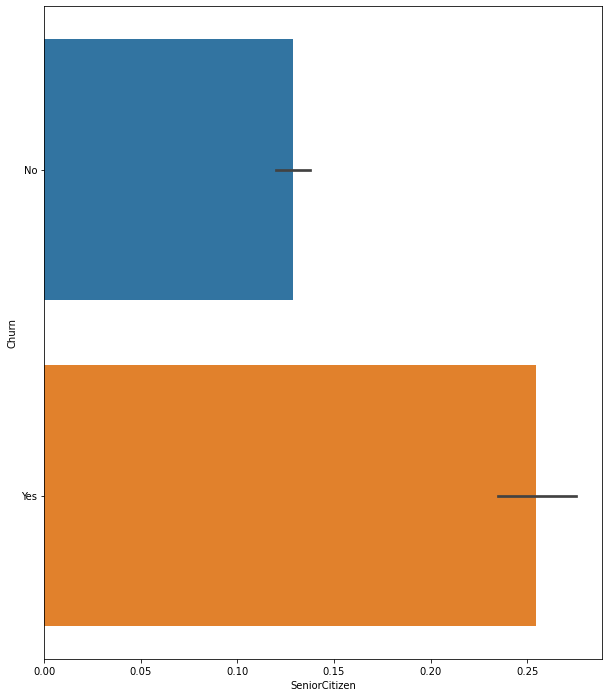

In [28]:
# Chances of churn based on gender
fig,  axes = plt.subplots( figsize=(10,12))


sns.barplot(x="SeniorCitizen", y="Churn", data=clean_df)
ax.set_xlabel('Senior Citizen')
ax.set_ylabel('Churn %')
ax.set_title('Among senior citizens and other category, what is the percentage of churn?')
ax.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])
ax.set_ylim(0,1)

plt.show()

In [27]:
clean_df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

## 2. Services

### a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning?

In [12]:

df_1 =clean_df.groupby(["PhoneService", "Churn"])["MonthlyCharges"].sum().reset_index()
df_1

,PhoneService,Churn,MonthlyCharges
0,No,No,22282.75
1,No,Yes,6380.75
2,Yes,No,294703.00
3,Yes,Yes,132750.10


In [9]:
clean_df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [17]:

fig = px.bar(df_1, x='PhoneService', y='MonthlyCharges', barmode = "group",
             hover_data=['PhoneService', 'Churn'], color='Churn', height=400)

fig.update_layout(legend = dict(bgcolor = "LemonChiffon", orientation = "v"), 
                  plot_bgcolor = "LemonChiffon")
fig.update_layout(title = dict(text =  'Comparison In Monthly charges and Churn in phoneService ',
                              
                                  font = dict(family = "Balto", color = "DarkMagenta", size = 26)))
fig.update_xaxes(title_text= "PhoneService", 
                 title_font_family= "Arial", 
                 title_font_size = 15,
                 title_font_color = "DarkMagenta")#, )
fig.update_yaxes(title_text= "MonthlyCharges",  
                 title_font_family= "Arial", 
                 title_font_size = 15,
                 title_font_color = "DarkMagenta")

fig.show()

In [31]:
df_2 =clean_df.groupby(["InternetService", "Churn"])["MonthlyCharges"].sum().reset_index()
df_2

,InternetService,Churn,MonthlyCharges
0,DSL,No,118136.15
1,DSL,Yes,22529.20
2,Fiber optic,No,168984.35
3,Fiber optic,Yes,114300.05
4,No,No,29865.25
5,No,Yes,2301.60


In [32]:

fig = px.bar(df_2, x='InternetService', y='MonthlyCharges', barmode = "group",
             hover_data=['InternetService', 'Churn'], color='Churn', height=400)

fig.update_layout(legend = dict(bgcolor = "LemonChiffon", orientation = "v"), 
                  plot_bgcolor = "LemonChiffon")
fig.update_layout(title = dict(text =  'Comparison In Monthly charges and Churn in InternetService ',
                              
                                  font = dict(family = "Balto", color = "DarkMagenta", size = 26)))
fig.update_xaxes(title_text= "InternetService", 
                 title_font_family= "Arial", 
                 title_font_size = 15,
                 title_font_color = "DarkMagenta")#, )
fig.update_yaxes(title_text= "MonthlyCharges",  
                 title_font_family= "Arial", 
                 title_font_size = 15,
                 title_font_color = "DarkMagenta")

fig.show()

In [28]:
df_3 =clean_df.groupby(["MultipleLines", "Churn"])["MonthlyCharges"].sum().reset_index()
df_3

,MultipleLines,Churn,MonthlyCharges
0,No,No,126681.65
1,No,Yes,57039.60
2,No phone service,No,22282.75
3,No phone service,Yes,6380.75
4,Yes,No,168021.35
5,Yes,Yes,75710.50


In [29]:

fig = px.bar(df_3, x='MultipleLines', y='MonthlyCharges', barmode = "group",
             hover_data=['MultipleLines', 'Churn'], color='Churn', height=400)

fig.update_layout(legend = dict(bgcolor = "LemonChiffon", orientation = "v"), 
                  plot_bgcolor = "LemonChiffon")
fig.update_layout(title = dict(text =  'Comparison In Monthly charges and Churn in MultipleLines ',
                              
                                  font = dict(family = "Balto", color = "DarkMagenta", size = 26)))
fig.update_xaxes(title_text= "MultipleLines", 
                 title_font_family= "Arial", 
                 title_font_size = 15,
                 title_font_color = "DarkMagenta")#, )
fig.update_yaxes(title_text= "MonthlyCharges",  
                 title_font_family= "Arial", 
                 title_font_size = 15,
                 title_font_color = "DarkMagenta")

fig.show()

In [33]:
df_4 =clean_df.groupby(["OnlineSecurity", "Churn"])["MonthlyCharges"].sum().reset_index()
df_4

,OnlineSecurity,Churn,MonthlyCharges
0,No,No,152011.60
1,No,Yes,112762.75
2,No internet service,No,29865.25
3,No internet service,Yes,2301.60
4,Yes,No,135108.90
5,Yes,Yes,24066.50


In [34]:

fig = px.bar(df_4, x='OnlineSecurity', y='MonthlyCharges', barmode = "group",
             hover_data=['OnlineSecurity', 'Churn'], color='Churn', height=400)

fig.update_layout(legend = dict(bgcolor = "LemonChiffon", orientation = "v"), 
                  plot_bgcolor = "LemonChiffon")
fig.update_layout(title = dict(text =  'Comparison In Monthly charges and Churn in OnlineSecurity ',
                              
                                  font = dict(family = "Balto", color = "DarkMagenta", size = 26)))
fig.update_xaxes(title_text= "OnlineSecurity", 
                 title_font_family= "Arial", 
                 title_font_size = 15,
                 title_font_color = "DarkMagenta")#, )
fig.update_yaxes(title_text= "MonthlyCharges",  
                 title_font_family= "Arial", 
                 title_font_size = 15,
                 title_font_color = "DarkMagenta")

fig.show()

In [35]:
df_5 =clean_df.groupby(["OnlineBackup", "Churn"])["MonthlyCharges"].sum().reset_index()
df_5

,OnlineBackup,Churn,MonthlyCharges
0,No,No,130270.70
1,No,Yes,91873.85
2,No internet service,No,29865.25
3,No internet service,Yes,2301.60
4,Yes,No,156849.80
5,Yes,Yes,44955.40


In [36]:
fig = px.bar(df_5, x='OnlineBackup', y='MonthlyCharges', barmode = "group",
             hover_data=['OnlineBackup', 'Churn'], color='Churn', height=400)

fig.update_layout(legend = dict(bgcolor = "LemonChiffon", orientation = "v"), 
                  plot_bgcolor = "LemonChiffon")
fig.update_layout(title = dict(text =  'Comparison In Monthly charges and Churn in OnlineBackup ',
                              
                                  font = dict(family = "Balto", color = "DarkMagenta", size = 26)))
fig.update_xaxes(title_text= "OnlineBackup", 
                 title_font_family= "Arial", 
                 title_font_size = 15,
                 title_font_color = "DarkMagenta")#, )
fig.update_yaxes(title_text= "MonthlyCharges",  
                 title_font_family= "Arial", 
                 title_font_size = 15,
                 title_font_color = "DarkMagenta")

fig.show()

In [39]:
df_6 =clean_df.groupby(["DeviceProtection", "Churn"])["MonthlyCharges"].sum().reset_index()
df_6

,DeviceProtection,Churn,MonthlyCharges
0,No,No,129758.00
1,No,Yes,88752.25
2,No internet service,No,29865.25
3,No internet service,Yes,2301.60
4,Yes,No,157362.50
5,Yes,Yes,48077.00


In [41]:
fig = px.bar(df_6, x='DeviceProtection', y='MonthlyCharges', barmode = "group",
             hover_data=['DeviceProtection', 'Churn'], color='Churn', height=400)

fig.update_layout(legend = dict(bgcolor = "LemonChiffon", orientation = "v"), 
                  plot_bgcolor = "LemonChiffon")
fig.update_layout(title = dict(text =  'Comparison In Monthly charges and Churn in DeviceProtection',
                              
                                  font = dict(family = "Balto", color = "DarkMagenta", size = 26)))
fig.update_xaxes(title_text= "DeviceProtection", 
                 title_font_family= "Arial", 
                 title_font_size = 15,
                 title_font_color = "DarkMagenta")#, )
fig.update_yaxes(title_text= "MonthlyCharges",  
                 title_font_family= "Arial", 
                 title_font_size = 15,
                 title_font_color = "DarkMagenta")

fig.show()

In [45]:
df_7 =clean_df.groupby(["TechSupport", "Churn"])["MonthlyCharges"].sum().reset_index()
df_7

,TechSupport,Churn,MonthlyCharges
0,No,No,148329.75
1,No,Yes,110709.80
2,No internet service,No,29865.25
3,No internet service,Yes,2301.60
4,Yes,No,138790.75
5,Yes,Yes,26119.45


In [46]:
fig = px.bar(df_7, x='TechSupport', y='MonthlyCharges', barmode = "group",
             hover_data=['TechSupport', 'Churn'], color='Churn', height=400)

fig.update_layout(legend = dict(bgcolor = "LemonChiffon", orientation = "v"), 
                  plot_bgcolor = "LemonChiffon")
fig.update_layout(title = dict(text =  'Comparison In Monthly charges and Churn in TechSupport',
                              
                                  font = dict(family = "Balto", color = "DarkMagenta", size = 26)))
fig.update_xaxes(title_text= "TechSupport", 
                 title_font_family= "Arial", 
                 title_font_size = 15,
                 title_font_color = "DarkMagenta")#, )
fig.update_yaxes(title_text= "MonthlyCharges",  
                 title_font_family= "Arial", 
                 title_font_size = 15,
                 title_font_color = "DarkMagenta")

fig.show()

In [47]:
df_8 =clean_df.groupby(["StreamingTV", "Churn"])["MonthlyCharges"].sum().reset_index()
df_8

,StreamingTV,Churn,MonthlyCharges
0,No,No,120575.00
1,No,Yes,63164.40
2,No internet service,No,29865.25
3,No internet service,Yes,2301.60
4,Yes,No,166545.50
5,Yes,Yes,73664.85


In [48]:
fig = px.bar(df_8, x='StreamingTV', y='MonthlyCharges', barmode = "group",
             hover_data=['StreamingTV', 'Churn'], color='Churn', height=400)

fig.update_layout(legend = dict(bgcolor = "LemonChiffon", orientation = "v"), 
                  plot_bgcolor = "LemonChiffon")
fig.update_layout(title = dict(text =  'Comparison In Monthly charges and Churn in StreamingTV',
                              
                                  font = dict(family = "Balto", color = "DarkMagenta", size = 26)))
fig.update_xaxes(title_text= "StreamingTV", 
                 title_font_family= "Arial", 
                 title_font_size = 15,
                 title_font_color = "DarkMagenta")#, )
fig.update_yaxes(title_text= "MonthlyCharges",  
                 title_font_family= "Arial", 
                 title_font_size = 15,
                 title_font_color = "DarkMagenta")

fig.show()

In [50]:
df_9 =clean_df.groupby(["StreamingMovies", "Churn"])["MonthlyCharges"].sum().reset_index()
df_9

,StreamingMovies,Churn,MonthlyCharges
0,No,No,118970.55
1,No,Yes,63263.55
2,No internet service,No,29865.25
3,No internet service,Yes,2301.60
4,Yes,No,168149.95
5,Yes,Yes,73565.70


In [51]:
fig = px.bar(df_9, x='StreamingMovies', y='MonthlyCharges', barmode = "group",
             hover_data=['StreamingMovies', 'Churn'], color='Churn', height=400)

fig.update_layout(legend = dict(bgcolor = "LemonChiffon", orientation = "v"), 
                  plot_bgcolor = "LemonChiffon")
fig.update_layout(title = dict(text =  'Comparison In Monthly charges and Churn in StreamingMovies',
                              
                                  font = dict(family = "Balto", color = "DarkMagenta", size = 26)))
fig.update_xaxes(title_text= "StreamingMovies", 
                 title_font_family= "Arial", 
                 title_font_size = 15,
                 title_font_color = "DarkMagenta")#, )
fig.update_yaxes(title_text= "MonthlyCharges",  
                 title_font_family= "Arial", 
                 title_font_size = 15,
                 title_font_color = "DarkMagenta")

fig.show()

#### The 3 services that contibute to a higher monthly charge and resulting to custormer churning are
1. Phone Service- 132K
2. Fiber optic under internet services - 114k
3. Multiple lines - 75k

### b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

In [52]:
clean_df.Contract

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object

In [54]:
df_10 =clean_df.groupby(["PhoneService", "Churn"])["Contract"].sum().reset_index()
df_10

,PhoneService,Churn,Contract
0,No,No,Month-to-monthOne yearMonth-to-monthTwo yearMo...
1,No,Yes,Month-to-monthMonth-to-monthMonth-to-monthMont...
2,Yes,No,One yearMonth-to-monthOne yearMonth-to-monthTw...
3,Yes,Yes,Month-to-monthMonth-to-monthMonth-to-monthMont...


In [53]:
clean_df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

## 3.  Payment: (Use visualizations in explaining your analysis)

#### a. If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
  1.  Basic
  2.  Plus
  3.  Premium


###  b. Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?